# **Walmart**

 ## Part I : Import useful libraries

In [1]:
!pip install plotly -q

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe_connected"

## Part II : EDA

In [3]:
# Import dataset
dataset = pd.read_csv("src/Walmart_Store_sales.csv")

In [4]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Other information: ")
print(dataset.info())
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Other information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
None

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
## Exploring columns

In [6]:
dataset.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
dataset.nunique()

Store            20
Date             85
Weekly_Sales    136
Holiday_Flag      2
Temperature     130
Fuel_Price      120
CPI             135
Unemployment    104
dtype: int64

In [8]:
type(dataset['Date'][0])

str

In [9]:
# Creating usable features from the Date column  

In [10]:
# Converting the values of 'Date' column into timestamp
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [11]:
type(dataset['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# creating new columns that contain the following numeric features : year, month, day and day of week

In [13]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
dataset['day_of_week'] = pd.DatetimeIndex(dataset['Date']).dayofweek

In [14]:
dataset['weekly_sales']=dataset['Weekly_Sales']

In [15]:
dataset = dataset.drop(['Date','Weekly_Sales'], 1)

In [16]:
dataset.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week,weekly_sales
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0,1572117.54
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,1807545.43
2,17.0,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0,NaN
3,11.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,1244390.03
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,1644470.66


In [17]:
dataset.describe(include='all')

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week,weekly_sales
count,150.000000,138.000000,132.000000,136.000000,138.000000,135.000000,132.000000,132.000000,132.000000,132.000000,1.360000e+02
mean,9.866667,0.079710,61.398106,3.320853,179.898509,7.598430,2010.856061,6.840909,16.075758,3.712121,1.249536e+06
std,6.231191,0.271831,18.378901,0.478149,40.274956,1.577173,0.811488,3.310473,8.781157,1.322329,6.474630e+05
min,1.000000,0.000000,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,0.000000,2.689290e+05
25%,4.000000,0.000000,45.587500,2.852250,131.970831,6.597500,2010.000000,4.000000,8.000000,4.000000,6.050757e+05
50%,9.000000,0.000000,62.985000,3.451000,197.908893,7.470000,2011.000000,7.000000,17.000000,4.000000,1.261424e+06
75%,15.750000,0.000000,76.345000,3.706250,214.934616,8.150000,2012.000000,10.000000,24.000000,4.000000,1.806386e+06
max,20.000000,1.000000,91.650000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000,6.000000,2.771397e+06


## Basic visualisations

### Features distribution

In [18]:
# Distribution of each quantitative variable
dataset
num_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "year", "month", "day", "day_of_week"]
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]]),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=True, height=2000)
fig1.update_layout(bargap=0.05)
fig1.show()

In [19]:
# Barplot of each qualitative variable

cat_features = ["Store", "Holiday_Flag"]
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):
    
    x_coords = dataset[cat_features[i]].value_counts().index.tolist()
    y_coords = dataset[cat_features[i]].value_counts().tolist()
    
    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot of qualitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig2.show()

### Weekly sales distribution according to each feature

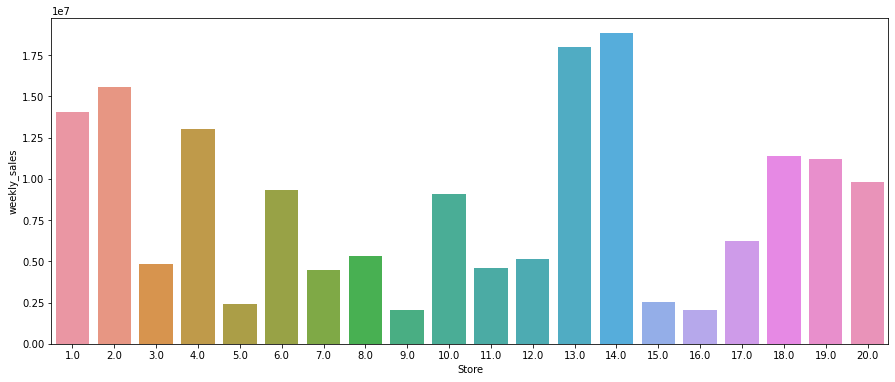

In [20]:
# According to stores
sales_store = pd.DataFrame(dataset.groupby('Store')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Store', y='weekly_sales', data=sales_store)

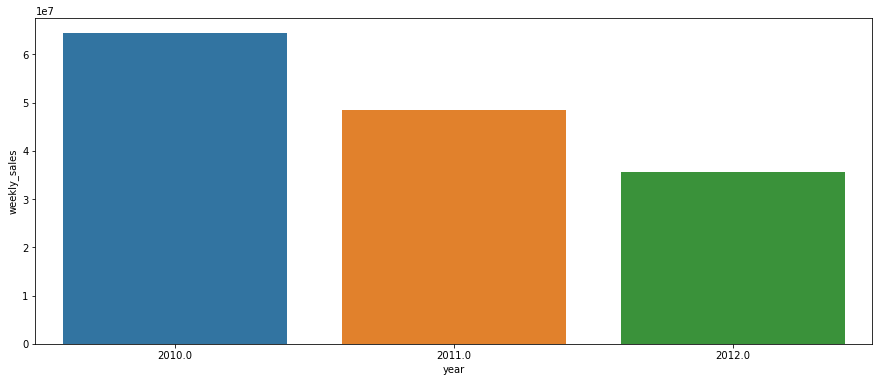

In [21]:
# According to years
sales_years = pd.DataFrame(dataset.groupby('year')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='year', y='weekly_sales', data=sales_years)

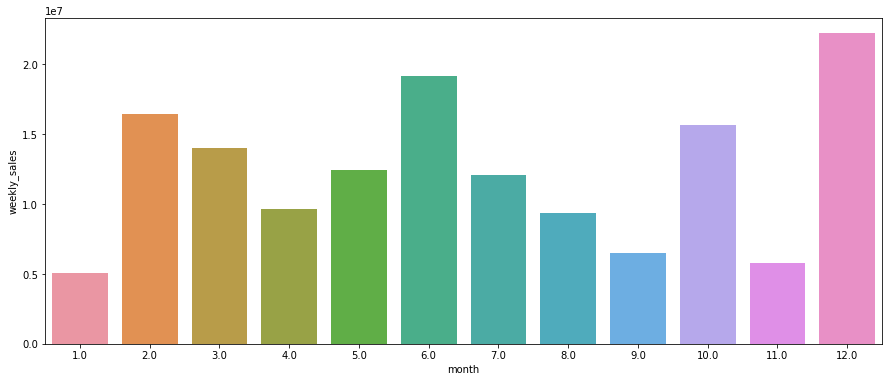

In [22]:
# According to months
sales_months = pd.DataFrame(dataset.groupby('month')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='month', y='weekly_sales', data=sales_months)

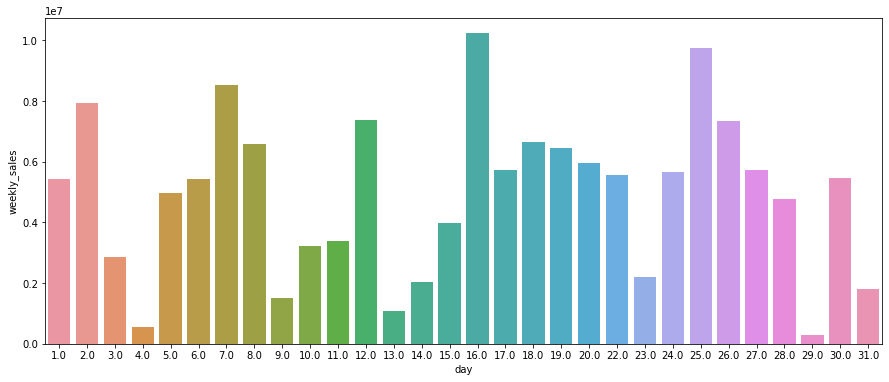

In [23]:
# According to days
sales_days = pd.DataFrame(dataset.groupby('day')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='day', y='weekly_sales', data=sales_days)

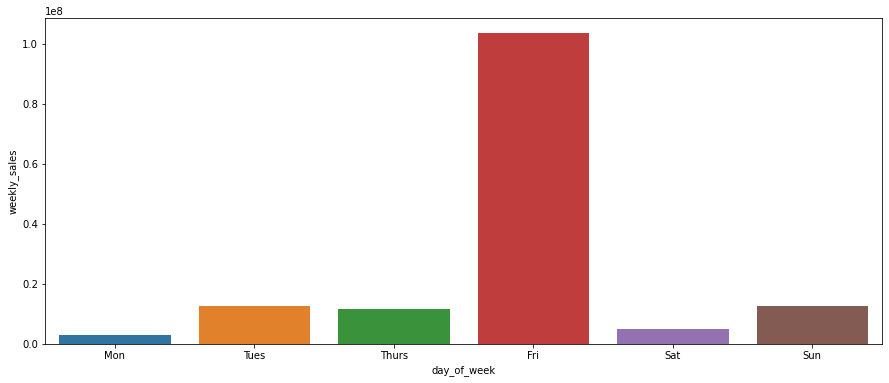

In [24]:
# According to days of week
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
sales_weekdays = pd.DataFrame(dataset.groupby('day_of_week')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=sales_weekdays['day_of_week'].map(days), y='weekly_sales', data=sales_weekdays)

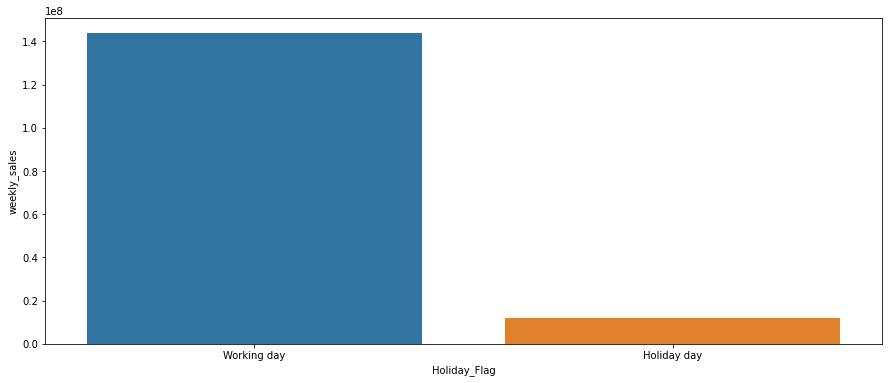

In [25]:
# According to holiday flag
flag = {0:'Working day',1:'Holiday day'}
sales_flag = pd.DataFrame(dataset.groupby('Holiday_Flag')['weekly_sales'].sum().reset_index())
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=sales_flag['Holiday_Flag'].map(flag), y='weekly_sales', data=sales_flag)

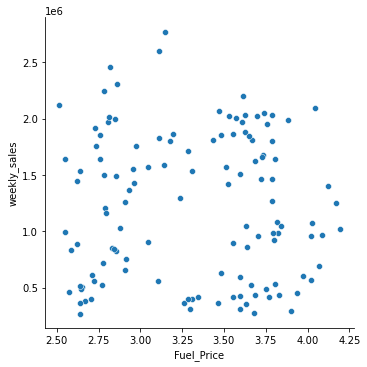

In [26]:
# According to fuel price
sns.relplot(x='Fuel_Price', y='weekly_sales', data=dataset)

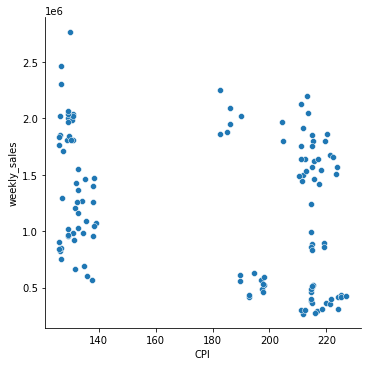

In [27]:
# According to CPI
sns.relplot(x='CPI', y='weekly_sales', data=dataset)

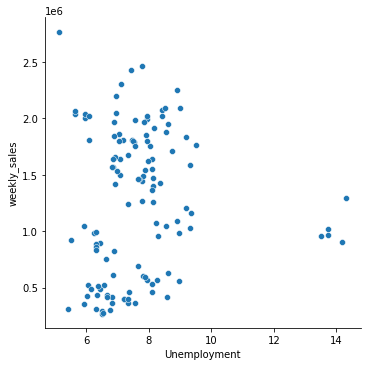

In [28]:
# According to unemployment
sns.relplot(x='Unemployment', y='weekly_sales', data=dataset)

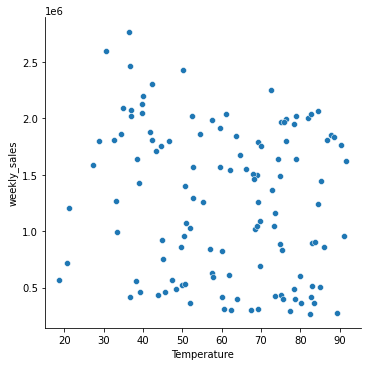

In [29]:
# According to unemployment
sns.relplot(x='Temperature', y='weekly_sales', data=dataset)

### Correlation matrix

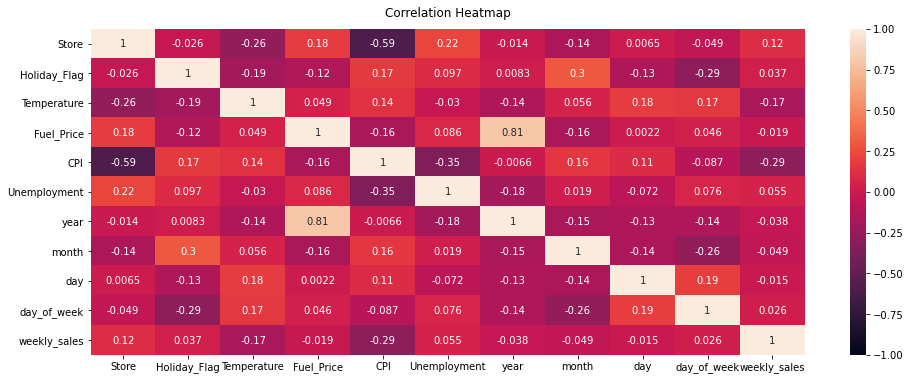

In [30]:
# Correlation matrix

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [31]:
# Interactive correlation matrix
corr_matrix = round(dataset.corr(),3)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist())
fig.show()

In [32]:
# Correlation coefficients with weekly sales column
corr = pd.DataFrame(corr_matrix.iloc[:,-1].sort_values(ascending=False))
corr

,weekly_sales
weekly_sales,1.000
Store,0.116
Unemployment,0.055
Holiday_Flag,0.037
day_of_week,0.026
day,-0.015
Fuel_Price,-0.019
year,-0.038
month,-0.049
Temperature,-0.166


In [33]:
# Neutralizing negative values
corr['corr_type']=['+' if corr['weekly_sales'][i]>0 else '-' for i in range(corr.shape[0])]
corr['weekly_sales'] = abs(corr['weekly_sales'])
corr = corr.sort_values('weekly_sales',ascending=False)
corr

,weekly_sales,corr_type
weekly_sales,1.000,+
CPI,0.287,-
Temperature,0.166,-
Store,0.116,+
Unemployment,0.055,+
month,0.049,-
year,0.038,-
Holiday_Flag,0.037,+
day_of_week,0.026,+
Fuel_Price,0.019,-


In [34]:
# Visualize pairwise dependencies
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
columns_pairwise = [c for c in cols]
fig = px.scatter_matrix(dataset[columns_pairwise])
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=800, width = 800)
fig.show()

## Part III : Preprocessings

### 1. Data cleaning

In [35]:
# Droping lines containing invalid values or outliers 

In [36]:
# Drop lines where the target value is missing
dataset = dataset.dropna(subset=['weekly_sales'])
print('Number of lines remaining : ', dataset.shape[0])

Number of lines remaining :  136


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

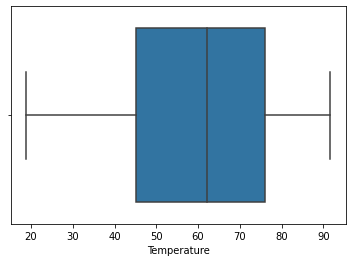

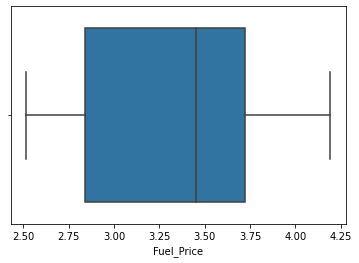

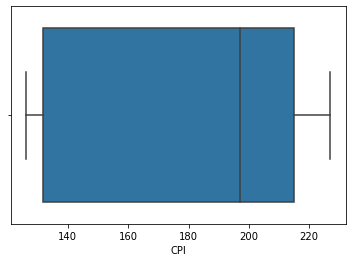

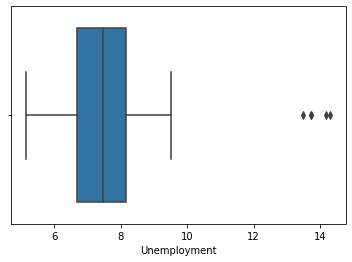

In [37]:
continuous_variables = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
for continuous_variable in continuous_variables:
    plt.figure()
    sns.boxplot(dataset[continuous_variable])

In [38]:
# Define a function that will help dropping outliers
def drop_outliers(data, column, coef_std):
    to_keep = (abs(data[column] - data[column].mean()) <= coef_std * data[column].std())
    data = data.loc[to_keep,:]
    return data

In [39]:
# Drop outliers in continuous_features : ['Temperature' , 'Fuel_Price' , 'CPI' , 'Unemployment']
coef_std = 3
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    dataset = drop_outliers(dataset, col, coef_std)
    print('Done. Number of lines remaining : ', dataset.shape[0])

Done. Number of lines remaining :  121
Done. Number of lines remaining :  109
Done. Number of lines remaining :  102
Done. Number of lines remaining :  90


In [40]:
dataset.describe(include='all', datetime_is_numeric=True)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week,weekly_sales
count,90.000000,80.000000,90.00000,90.000000,90.000000,90.000000,80.000000,80.000000,80.000000,80.000000,9.000000e+01
mean,9.900000,0.075000,61.06100,3.318444,179.524905,7.389733,2010.887500,6.525000,15.962500,3.650000,1.233865e+06
std,6.204475,0.265053,17.74604,0.484399,39.554303,0.982729,0.826672,3.329861,8.594145,1.388014,6.647250e+05
min,1.000000,0.000000,18.79000,2.548000,126.128355,5.143000,2010.000000,1.000000,1.000000,0.000000,2.689290e+05
25%,4.000000,0.000000,45.34250,2.814750,132.602339,6.642250,2010.000000,4.000000,8.000000,4.000000,5.617240e+05
50%,9.000000,0.000000,61.45000,3.468000,197.166416,7.419000,2011.000000,6.000000,16.500000,4.000000,1.260826e+06
75%,15.750000,0.000000,75.79250,3.737750,214.855374,8.099000,2012.000000,9.250000,23.250000,4.000000,1.807159e+06
max,20.000000,1.000000,91.65000,4.170000,226.968844,9.342000,2012.000000,12.000000,31.000000,6.000000,2.771397e+06


In [41]:
dataset.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'year', 'month', 'day', 'day_of_week', 'weekly_sales'],
      dtype='object')

### 2. Preprocessings with scikit-learn

In [42]:
# Separate the target from features
target = 'weekly_sales'
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month','day', 'day_of_week']
cat_features = ['Store', 'Holiday_Flag']

Y = dataset.loc[:,target]
X = dataset.loc[:,[c for c in dataset.columns if c!=target]]

In [43]:
X.describe(include='all')

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
count,90.000000,80.000000,90.00000,90.000000,90.000000,90.000000,80.000000,80.000000,80.000000,80.000000
mean,9.900000,0.075000,61.06100,3.318444,179.524905,7.389733,2010.887500,6.525000,15.962500,3.650000
std,6.204475,0.265053,17.74604,0.484399,39.554303,0.982729,0.826672,3.329861,8.594145,1.388014
min,1.000000,0.000000,18.79000,2.548000,126.128355,5.143000,2010.000000,1.000000,1.000000,0.000000
25%,4.000000,0.000000,45.34250,2.814750,132.602339,6.642250,2010.000000,4.000000,8.000000,4.000000
50%,9.000000,0.000000,61.45000,3.468000,197.166416,7.419000,2011.000000,6.000000,16.500000,4.000000
75%,15.750000,0.000000,75.79250,3.737750,214.855374,8.099000,2012.000000,9.250000,23.250000,4.000000
max,20.000000,1.000000,91.65000,4.170000,226.968844,9.342000,2012.000000,12.000000,31.000000,6.000000


In [44]:
display(100*dataset.isnull().sum()/dataset.shape[0])

Store            0.000000
Holiday_Flag    11.111111
Temperature      0.000000
Fuel_Price       0.000000
CPI              0.000000
Unemployment     0.000000
year            11.111111
month           11.111111
day             11.111111
day_of_week     11.111111
weekly_sales     0.000000
dtype: float64

In [45]:
dataset[dataset.columns] = dataset[dataset.columns].apply(pd.to_numeric, errors='coerce')
dataset = dataset.fillna(dataset.median()) 

In [46]:
display(100*dataset.isnull().sum()/dataset.shape[0])

Store           0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
day_of_week     0.0
weekly_sales    0.0
dtype: float64

In [47]:
dataset.isnull().any()

Store           False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
year            False
month           False
day             False
day_of_week     False
weekly_sales    False
dtype: bool

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Holiday_Flag  90 non-null     float64
 2   Temperature   90 non-null     float64
 3   Fuel_Price    90 non-null     float64
 4   CPI           90 non-null     float64
 5   Unemployment  90 non-null     float64
 6   year          90 non-null     float64
 7   month         90 non-null     float64
 8   day           90 non-null     float64
 9   day_of_week   90 non-null     float64
 10  weekly_sales  90 non-null     float64
dtypes: float64(11)
memory usage: 8.4 KB


In [49]:
# Divide data into train set & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [50]:
X_train.head(10)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
127,16.0,0.0,61.79,2.711,189.523128,6.868,2010.0,9.0,7.0,1.0
63,5.0,0.0,69.17,3.594,224.019287,5.422,2012.0,10.0,19.0,4.0
35,19.0,0.0,33.26,3.789,133.958742,7.771,2011.0,3.0,25.0,4.0
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0
95,1.0,0.0,74.78,2.854,210.337426,7.808,2010.0,5.0,14.0,4.0
73,1.0,NaN,85.22,2.619,211.567306,7.787,2010.0,8.0,27.0,4.0
130,13.0,0.0,52.50,3.529,130.826194,6.104,2012.0,3.0,16.0,4.0
83,15.0,0.0,79.97,3.972,135.873839,7.806,NaN,NaN,NaN,NaN
120,8.0,0.0,75.32,2.582,214.878556,6.315,2010.0,9.0,17.0,4.0
129,18.0,0.0,73.25,3.840,138.185710,8.535,NaN,NaN,NaN,NaN


In [51]:
#X_train[X_train.columns] = X_train[X_train.columns].apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(X_train.median()) 
X_test = X_test.fillna(X_test.median()) 

In [52]:
X_train.head(10)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
127,16.0,0.0,61.79,2.711,189.523128,6.868,2010.0,9.0,7.0,1.0
63,5.0,0.0,69.17,3.594,224.019287,5.422,2012.0,10.0,19.0,4.0
35,19.0,0.0,33.26,3.789,133.958742,7.771,2011.0,3.0,25.0,4.0
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0
95,1.0,0.0,74.78,2.854,210.337426,7.808,2010.0,5.0,14.0,4.0
73,1.0,0.0,85.22,2.619,211.567306,7.787,2010.0,8.0,27.0,4.0
130,13.0,0.0,52.50,3.529,130.826194,6.104,2012.0,3.0,16.0,4.0
83,15.0,0.0,79.97,3.972,135.873839,7.806,2011.0,7.0,16.0,4.0
120,8.0,0.0,75.32,2.582,214.878556,6.315,2010.0,9.0,17.0,4.0
129,18.0,0.0,73.25,3.840,138.185710,8.535,2011.0,7.0,16.0,4.0


In [53]:
X_num_trainset = X_train.loc[:,[c for c in num_features]]
X_cat_trainset = X_train.loc[:,[c for c in cat_features]]
X_num_testset = X_test.loc[:,[c for c in num_features]]
X_cat_testset = X_test.loc[:,[c for c in cat_features]]

In [54]:
X_num_trainset.head()

,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
127,61.79,2.711,189.523128,6.868,2010.0,9.0,7.0,1.0
63,69.17,3.594,224.019287,5.422,2012.0,10.0,19.0,4.0
35,33.26,3.789,133.958742,7.771,2011.0,3.0,25.0,4.0
10,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0
95,74.78,2.854,210.337426,7.808,2010.0,5.0,14.0,4.0


In [55]:
X_cat_trainset.head()

,Store,Holiday_Flag
127,16.0,0.0
63,5.0,0.0
35,19.0,0.0
10,8.0,0.0
95,1.0,0.0


In [56]:
Y_train[0:5]

127     614253.33
63      313358.15
35     1266564.94
10      895066.50
95     1494251.50
Name: weekly_sales, dtype: float64

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     float64
 1   Holiday_Flag  80 non-null     float64
 2   Temperature   90 non-null     float64
 3   Fuel_Price    90 non-null     float64
 4   CPI           90 non-null     float64
 5   Unemployment  90 non-null     float64
 6   year          80 non-null     float64
 7   month         80 non-null     float64
 8   day           80 non-null     float64
 9   day_of_week   80 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


In [58]:
X_num_train = X_num_trainset.values
X_num_test = X_num_testset.values
X_cat_train = X_cat_trainset.values
X_cat_test = X_cat_testset.values

In [59]:
# Encoding categorical features and standardizing numerical features

# Normalization
sc = StandardScaler()
X_num_train = sc.fit_transform(X_num_train)
X_num_test = sc.transform(X_num_test)

# OHE
ohe = OneHotEncoder(drop='first')
X_cat_train = ohe.fit_transform(X_cat_train)
X_cat_test = ohe.transform(X_cat_test)

In [60]:
X_num_train[0]

array([ 0.04260362, -1.26840641,  0.20507788, -0.55534542, -1.1763434 ,
        0.74406169, -1.10466577, -2.03634567])

In [61]:
X_cat_train[0]

<1x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [62]:
import numpy as np
from scipy.sparse import csr_matrix
a = csr_matrix(X_cat_train[0]).toarray()[0]

In [63]:
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.])

In [64]:
np.concatenate((a,X_num_train[0]))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04260362,
       -1.26840641,  0.20507788, -0.55534542, -1.1763434 ,  0.74406169,
       -1.10466577, -2.03634567])

In [65]:
X_num_train.shape[0]

72

In [66]:
X_cat_train.shape[0]

72

In [67]:
# Concatenate preprocessed features
x_train= [None] * X_num_train.shape[0]
for i in range(X_num_train.shape[0]):
   x_train[i] = np.concatenate((X_num_train[i],csr_matrix(X_cat_train[i]).toarray()[0]))

x_test= [None] * X_num_test.shape[0]
for i in range(X_num_test.shape[0]):
   x_test[i] = np.concatenate((X_num_test[i],csr_matrix(X_cat_test[i]).toarray()[0]))

In [68]:
x_train[0]

array([ 0.04260362, -1.26840641,  0.20507788, -0.55534542, -1.1763434 ,
        0.74406169, -1.10466577, -2.03634567,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

## Part IV : Machine learning modelling

### 1. Linear regression

In [69]:
# Train model
regressor = LinearRegression()
regressor.fit(x_train, Y_train) 

LinearRegression()

In [70]:
# Predictions on training set
Y_train_pred = regressor.predict(x_train)

In [71]:
# Predictions on test set
Y_test_pred = regressor.predict(x_test)

In [72]:
# R2 scores
sc_regressor = (r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred))
print("R2 score on training set : ", sc_regressor[0])
print("R2 score on test set : ", sc_regressor[1])
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9872729747897621
R2 score on test set :  0.9205143395423314
R2 score on training set :  0.9872729747897621
R2 score on test set :  0.9205143395423314


<AxesSubplot:xlabel='weekly_sales'>

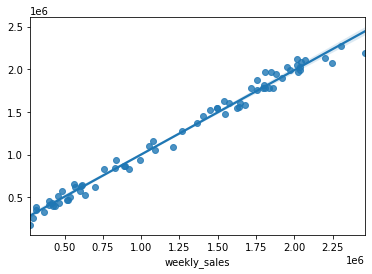

In [73]:
# Visualization of the model performance on the train set
sns.regplot(x=Y_train,y=Y_train_pred)

<AxesSubplot:xlabel='weekly_sales'>

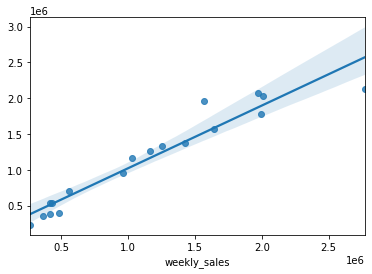

In [74]:
# Visualization of the model performance on the test set
sns.regplot(x=Y_test,y=Y_test_pred)

#### Coefficients importance analysis

In [75]:
# Get the regressor coefficients
coefs = regressor.coef_
coefs

array([-1.54652237e+03, -4.95535198e+04,  8.95505770e+05,  3.44490165e+04,
       -3.41753612e+04,  6.61667573e+03, -5.02247508e+04, -1.98919267e+04,
        2.70725103e+05, -1.26975244e+06,  2.60465883e+06, -1.22723018e+06,
        8.97407137e+04, -5.04693067e+05, -6.77059766e+05, -1.13381840e+06,
        2.21117929e+06,  2.75337740e+05,  2.49206740e+06,  1.15215695e+06,
        9.72610528e+05, -5.00150955e+05,  1.28085398e+06,  1.35171050e+06,
        1.71288526e+06,  6.44886032e+05, -1.11664259e+05])

In [76]:
# Verify the order
x_train[0]

array([ 0.04260362, -1.26840641,  0.20507788, -0.55534542, -1.1763434 ,
        0.74406169, -1.10466577, -2.03634567,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [77]:
cat_names = ohe.get_feature_names().tolist()

In [78]:
features = num_features + cat_names

In [79]:
features

['Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'year',
 'month',
 'day',
 'day_of_week',
 'x0_2.0',
 'x0_3.0',
 'x0_4.0',
 'x0_5.0',
 'x0_6.0',
 'x0_7.0',
 'x0_8.0',
 'x0_9.0',
 'x0_10.0',
 'x0_11.0',
 'x0_13.0',
 'x0_14.0',
 'x0_15.0',
 'x0_16.0',
 'x0_17.0',
 'x0_18.0',
 'x0_19.0',
 'x0_20.0',
 'x1_1.0']

In [80]:
named_features = []
for feature in features:
    if feature.startswith('x0'):
        named_features.append('Store' + feature[2:-2])
    elif feature.startswith('x1'):
        named_features.append('Flag' + feature[2:-2])
    else:
        named_features.append(feature)
        
named_features

['Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'year',
 'month',
 'day',
 'day_of_week',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Flag_1']

In [81]:
coefs_df = pd.DataFrame(coefs, columns=['Regressor coefficients'], index=named_features)

In [82]:
coefs_df = coefs_df.sort_values('Regressor coefficients',ascending=False).reset_index()
coefs_df.columns=['Features','Regressor coefficients']
coefs_df

,Features,Regressor coefficients
0,Store_4,2.604659e+06
1,Store_13,2.492067e+06
2,Store_10,2.211179e+06
3,Store_19,1.712885e+06
4,Store_18,1.351710e+06
5,Store_17,1.280854e+06
6,Store_14,1.152157e+06
7,Store_15,9.726105e+05
8,CPI,8.955058e+05
9,Store_20,6.448860e+05


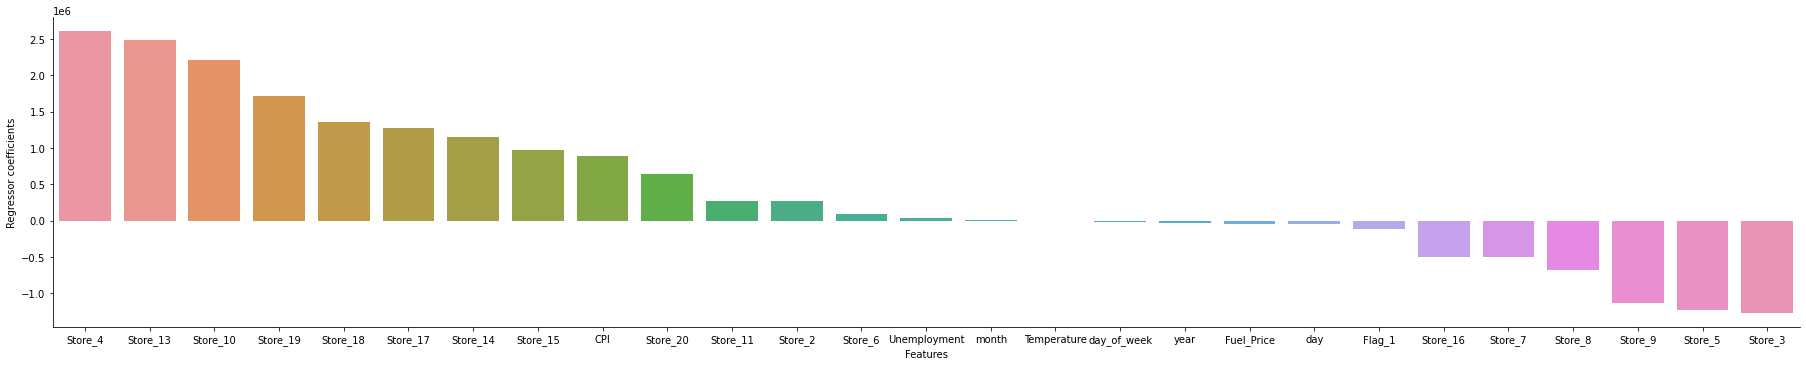

In [83]:
# Visualize features importance
sns.catplot(x="Features", 
            y='Regressor coefficients', 
            data=coefs_df, 
            kind="bar",
            aspect=50/10) 

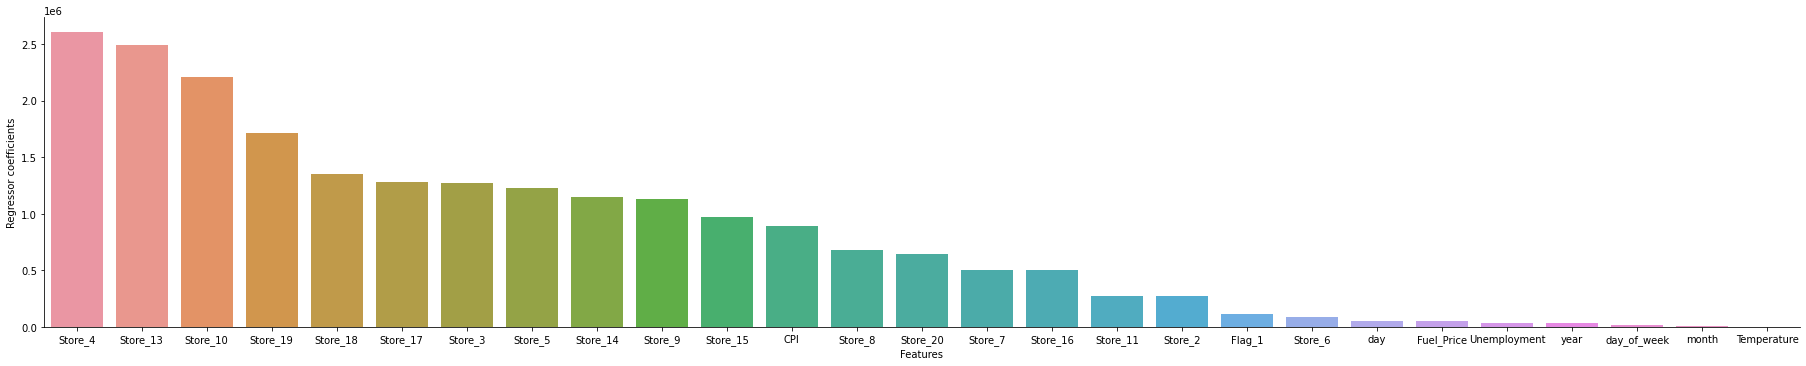

In [84]:
# Visualize feature importance with abs values
coefs_df['Regressor coefficients'] = abs(coefs_df['Regressor coefficients'])
sns.catplot(x="Features", 
            y='Regressor coefficients', 
            data=coefs_df.sort_values('Regressor coefficients',ascending=False).reset_index(), 
            kind="bar",
            aspect=50/10) 

### 2. RIDGE-regularized model without hyper parameter optimization

In [85]:
ridge_regressor_nr = Ridge()
ridge_regressor_nr.fit(x_train, Y_train)
Y_train_pred = ridge_regressor_nr.predict(x_train)
Y_test_pred = ridge_regressor_nr.predict(x_test)
sc_ridge_nr = (r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred))
print("R2 score on training set : ", sc_ridge_nr[0])
print("R2 score on test set : ", sc_ridge_nr[1])

R2 score on training set :  0.9313957883382701
R2 score on test set :  0.8252721925880352


### 3. RIDGE-regularized model with hyper parameter optimization

In [86]:
# Iterate on few alpha values to get the best regularization params

In [87]:
ridge_regressor1 = Ridge()
params = {
    'alpha': [0.0, 0.25, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge_regressor1, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(x_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.25}
Best R2 score :  0.8073416057202213


In [88]:
ridge_regressor2 = Ridge()
params = {
    'alpha': [0.0, 0.1, 0.2, 0.3] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge_regressor2, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(x_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.8262927909736183


In [89]:
ridge_regressor3 = Ridge()
params = {
    'alpha': [0.05, 0.1, 0.15, 0.2] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge_regressor3, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(x_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.05}
Best R2 score :  0.8358646072102122


In [90]:
ridge_regressor4 = Ridge()
params = {
    'alpha': [0.01, 0.02, 0.03, 0.04] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge_regressor4, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(x_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.8662491831032796


In [91]:
# Best regularization params
ridge_regressor = Ridge()
params = {
    'alpha': [0.0015, 0.002, 0.0025, 0.003] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(ridge_regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(x_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Best hyperparameters :  {'alpha': 0.002}
Best R2 score :  0.9116997846074545


In [92]:
# MAke predictions with the best regularized model
Y_train_pred = gridsearch.predict(x_train)
Y_test_pred = gridsearch.predict(x_test)

In [93]:
sc_ridge_r = (r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_test_pred))
print("R2 score on training set : ", sc_ridge_r[0])
print("R2 score on test set : ", sc_ridge_r[1])

R2 score on training set :  0.9868733183186233
R2 score on test set :  0.9239296162520408


### Part V : Summary

In [94]:
# Store models scores in a dataframe
model = ["Baseline model : Linear regression", 
            "Ridge-regularized model without hyper parameter optimization", 
            "Ridge-regularized model with hyper parameter optimization"]
scores_train = [sc_regressor[0], sc_ridge_nr[0],sc_ridge_r[0]]
scores_test = [sc_regressor[1], sc_ridge_nr[1],sc_ridge_r[1]]
columns=["Model description", "R2 score on training set", "R2 score on test set"]

summary = pd.DataFrame((model,scores_train,scores_test)).transpose()
summary.columns = columns

In [95]:
summary.sort_values('R2 score on test set',ascending=False)

,Model description,R2 score on training set,R2 score on test set
2,Ridge-regularized model with hyper parameter o...,0.986873,0.92393
0,Baseline model : Linear regression,0.987273,0.920514
1,Ridge-regularized model without hyper paramete...,0.931396,0.825272
